# Introdução


Nesse pequeno tutorial vamos ver um pouco sobre
* Jupyter
* Pandas
* Seaborn
* Scikit-learn
* eli5


# Jupyter

O [Jupyter](https://jupyter.org/) é um ambiente de desenvolvimento para diversas linguagens interpretadas como Python e R.

Permite a execução de "blocos" de código.

Pode se mesclar códigos com explicações.

Tutoriais:
- https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook
- https://www.dataquest.io/blog/jupyter-notebook-tutorial/

Simples olá mundo

In [1]:
print("Olá mundo!")

Olá mundo!


Base de dados que iremos utilizar Iris:

![Iris](http://s5047.pcdn.co/wp-content/uploads/2015/04/iris_petal_sepal.png)

Baixando a base Iris.

In [2]:
import urllib.request

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
file = "iris.data"

urllib.request.urlretrieve(url, file)

('iris.data', <http.client.HTTPMessage at 0x1da936802e8>)

# Pandas

A biblioteca [Pandas](https://pandas.pydata.org/) permite trabalhar com tabelas em python.

Basicamente um Excel em Python.

Tutoriais:
- https://www.datacamp.com/community/tutorials/pandas-tutorial-dataframe-python
- https://www.dataquest.io/blog/pandas-python-tutorial/

Lendo o arquivo que baixamos antes e colocando nome em suas colunas

In [3]:
import pandas as pd

feature_names = ["sepal length", "sepal width", "petal length", "petal width"]
class_name = "species"

df = pd.read_csv(file, names=feature_names + [class_name])


O atributo `shape` mostra o formato da tabela em linhas e colunas.
O método `head()` permite selecionar o início da tabela. Útil para conferir uma tabela.

In [4]:
print(df.shape)
df.head()

(150, 5)


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


É possivel selecionar colunas e linhas.
Aqui selecionamos os elementos unicos na coluna `label`.



In [5]:
df[class_name].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Aqui já selecionamos a linha com index 2

In [6]:
df.iloc[2]

sepal length            4.7
sepal width             3.2
petal length            1.3
petal width             0.2
species         Iris-setosa
Name: 2, dtype: object

`describe()` apresenta algumas informações interessantes de cada coluna com valores númericos.

In [7]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Seaborn

A biblioteca [seaborn](https://seaborn.pydata.org/) facilita plotar alguns gráficos com mais detalhes.

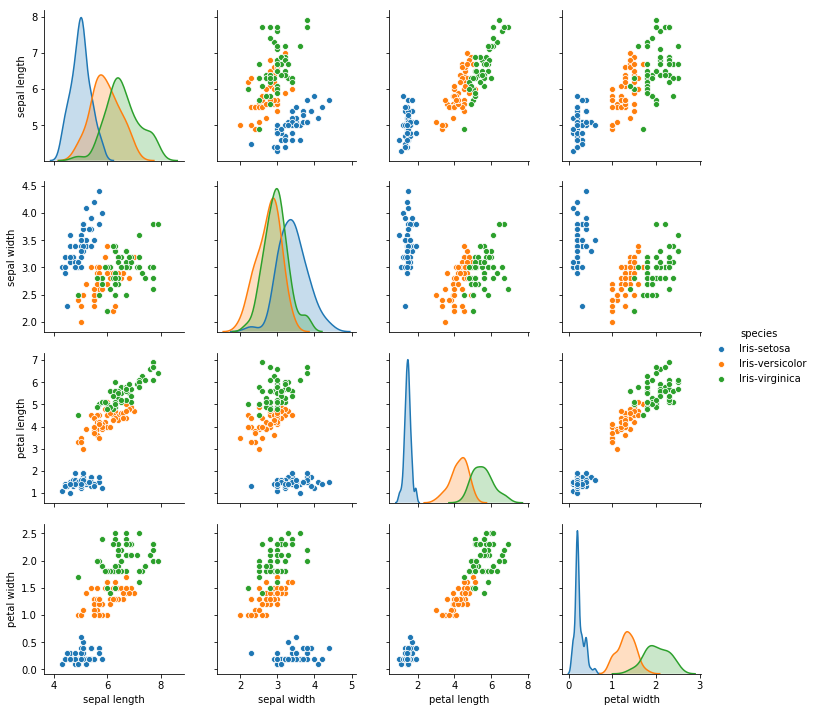

In [8]:
%matplotlib inline
import seaborn as sns

sns.pairplot(df, hue=class_name)

# Scikit-learn

A biblioteca [scikit-learn](https://scikit-learn.org/) oferece diversas ferramentas para a mineração e análise de dados.

Ela possui ferramentas para pré-processamento, classificação, clusterização, regressão entre outras.

Tutoriais:
- https://www.datacamp.com/community/tutorials/machine-learning-python
- https://www.dataquest.io/blog/sci-kit-learn-tutorial/

Antes de qualquer coisa vamos primeiro separar os atributos preditivos do atributo classe

In [9]:
X = df[feature_names]
y = df[class_name]

Podemos ver nas análises anteriores que nossa base não está normalizada.

Como normalizar esses dados?

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_model = scaler.fit(X)

normalized_X = scaler_model.transform(X)

Será que os dados mudaram muito?

In [11]:
X_df = pd.DataFrame(normalized_X, columns=feature_names)
X_df[class_name] = y
X_df.head()

,sepal length,sepal width,petal length,petal width,species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


In [12]:
X_df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778
std,0.230018,0.180664,0.299054,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


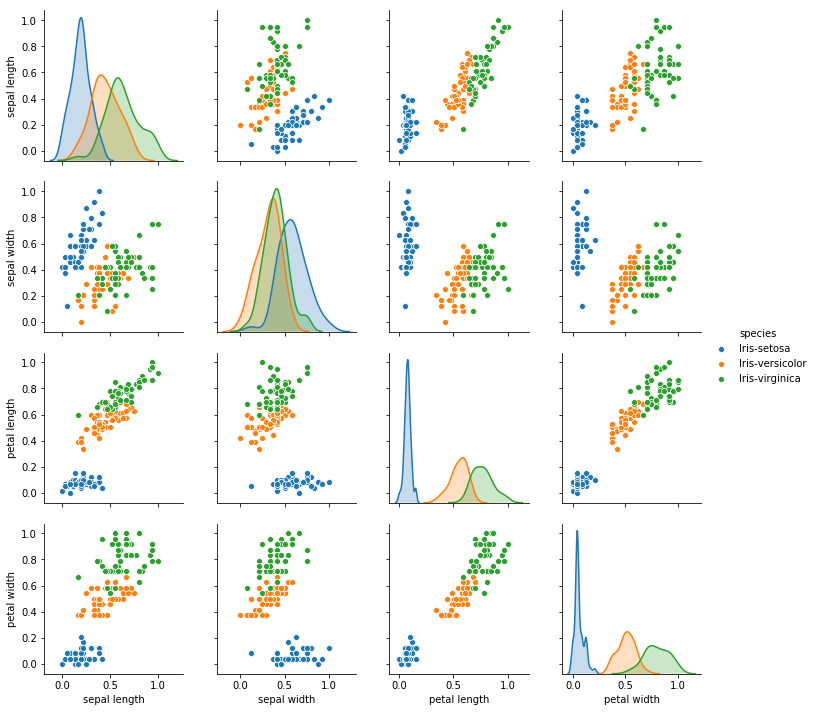

In [13]:
sns.pairplot(X_df, hue=class_name)

Vamos treinar um modelo para classificaçãos utilizando árvore de decisão.

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
model = dt.fit(normalized_X, y)

Algumas instâncias fictícias para testar o modelo.

In [15]:
instances_to_predict = [[4.7,   2,   6.8,  0.3],
                        [4.5, 4.4, 2.05, 1.9],
                        [7,   2,   1.1,  2.2]]

In [16]:
model.predict(instances_to_predict)

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

Notam algum problema?

Precisamos aplicar o mesmo pré-processamento para todas instâncias.

In [17]:
normalized_instances = scaler_model.transform(instances_to_predict)
model.predict(normalized_instances)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
normalized_instances

array([[0.11111111, 0.        , 0.98305085, 0.08333333],
       [0.05555556, 1.        , 0.1779661 , 0.75      ],
       [0.75      , 0.        , 0.01694915, 0.875     ]])

# Avaliação

Nosso modelo funciona, mas ele é bom?

Precisamos avaliá-lo!

Avaliando a Micro F1

In [19]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, normalized_X, y, cv=10, scoring="f1_micro")
print("Micro F1: ")
print("Valores: ", scores)
print("Média: ", sum(scores) / len(scores))

Micro F1: 
Valores:  [1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]
Média:  0.9533333333333335


Avaliando a Macro F1

In [20]:
scores = cross_val_score(dt, normalized_X, y, cv=10, scoring="f1_macro")
print("Macro F1: ")
print("Valores: ", scores)
print("Média: ", sum(scores) / len(scores))

Macro F1: 
Valores:  [1.         0.93265993 1.         0.93265993 0.93265993 0.86666667
 0.93265993 0.93265993 1.         1.        ]
Média:  0.952996632996633


# Avançado

É interessante juntar todas as tarefas utilizadas em uma pipeline para facilitar a utilização e parametrização.

In [21]:
from sklearn.pipeline import Pipeline

steps = [("Scaler", scaler),
         ("Classifier", dt)]

full_pipeline = Pipeline(steps)

full_pipeline

Pipeline(memory=None,
     steps=[('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('Classifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

Fazendo uma busca por melhores parametros.

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'Classifier__criterion': ["gini", "entropy"],
              'Classifier__min_samples_leaf': [1, 2, 3],
              'Classifier__min_samples_split': [0.2, 0.5, 0.7]}

gscv = GridSearchCV(full_pipeline, param_grid, cv=10)

gscv.fit(X, y)

best_config = gscv.best_estimator_
print(best_config, gscv.best_score_)

Pipeline(memory=None,
     steps=[('Scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('Classifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=0.2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]) 0.9666666666666667


Podemos utilizar essa métrica para julgar o modelo?

# Extra: eli5

A bliblioteca [eli5](https://eli5.readthedocs.io/) pode ajudar a descobrir por que um classificador classificou daquela forma.

In [24]:
import eli5

eli5.show_weights(best_config, top=10, feature_names=feature_names,
                  target_names=best_config.classes_)

Weight,Feature
0.9464,petal width
0.0536,petal length
0,sepal width
0,sepal length
